In [1]:
import pandas as pd
import csv
import numpy as np
import seaborn as sns
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from tqdm import tqdm as tqdm
import time
import datetime
import os
import glob

In [60]:
read_path = "C:/Users/Miles/Desktop/ICE data/Apps/OBDLink (1)/CsvLogs/"

dir_list_api = os.listdir(read_path)

In [69]:
#read through the csvs provided 
files = glob.glob('C:/Users/Miles/Desktop/ICE data/Apps/OBDLink (1)/CsvLogs/5YFBURHE2HP609481/*.csv')

full_df = pd.DataFrame()

for csv_file in files:
    df = pd.read_csv(csv_file, skiprows=[0, 1])
    full_df = pd.concat([full_df, df])

In [70]:
full_df.shape, full_df.isna().sum()

((33600, 68),
 0.000                                            33241
 34.24313                                         33241
 -118.5323                                        33241
 0                                                33241
 Time (sec)                                         359
                                                  ...  
  Intake air temperature bank 1  sensor 3 (°F)    19833
  Intake air temperature bank 2  sensor 1 (°F)    19833
  Intake air temperature bank 2  sensor 2 (°F)    19833
  Intake air temperature bank 2  sensor 3 (°F)    19833
  Vehicle Odometer Reading (miles)                19833
 Length: 68, dtype: int64)

In [71]:
full_df

,0.000,34.24313,-118.5323,0,Time (sec),Latitude (deg),Longitude (deg),Vehicle speed (MPH),Instant CO2 rate (lb/mile),Total CO2 (lbs),...,Rotation Rate Y (deg/s),Rotation Rate Z (deg/s),Trip Fuel (gal),Trip Fuel Economy (MPG),Intake air temperature bank 1 sensor 2 (°F),Intake air temperature bank 1 sensor 3 (°F),Intake air temperature bank 2 sensor 1 (°F),Intake air temperature bank 2 sensor 2 (°F),Intake air temperature bank 2 sensor 3 (°F),Vehicle Odometer Reading (miles)
0,0.363,34.24313,-118.5323,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.367,34.24314,-118.5323,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.368,34.24314,-118.5323,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.368,34.24314,-118.5323,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.367,34.24314,-118.5323,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3524,NaN,NaN,NaN,NaN,3678.923,34.03304,-118.4652,0.0,0.0,251.7497,...,-57.29681,-21.04448,1.041432,29.66561,0.0,0.0,0.0,0.0,0.0,0.0
3525,NaN,NaN,NaN,NaN,3679.930,34.03304,-118.4652,0.0,0.0,251.7497,...,68.73888,-24.71661,1.041432,29.66561,0.0,0.0,0.0,0.0,0.0,0.0
3526,NaN,NaN,NaN,NaN,3680.935,34.03305,-118.4652,0.0,0.0,251.7497,...,24.48018,-51.31284,1.041432,29.66561,0.0,0.0,0.0,0.0,0.0,0.0
3527,NaN,NaN,NaN,NaN,3681.915,34.03305,-118.4652,0.0,0.0,251.7497,...,-41.95052,-16.55858,1.041432,29.66561,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
full_df = full_df.loc[:, (full_df != 0).any(axis = 0)]
full_df

,0.000,34.24313,-118.5323,0,Time (sec),Latitude (deg),Longitude (deg),Vehicle speed (MPH),Instant CO2 rate (lb/mile),Total CO2 (lbs),...,Rotation Rate Y (deg/s),Rotation Rate Z (deg/s),Trip Fuel (gal),Trip Fuel Economy (MPG),Intake air temperature bank 1 sensor 2 (°F),Intake air temperature bank 1 sensor 3 (°F),Intake air temperature bank 2 sensor 1 (°F),Intake air temperature bank 2 sensor 2 (°F),Intake air temperature bank 2 sensor 3 (°F),Vehicle Odometer Reading (miles)
0,0.363,34.24313,-118.5323,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.367,34.24314,-118.5323,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.368,34.24314,-118.5323,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.368,34.24314,-118.5323,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.367,34.24314,-118.5323,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3524,NaN,NaN,NaN,NaN,3678.923,34.03304,-118.4652,0.0,0.0,251.7497,...,-57.29681,-21.04448,1.041432,29.66561,0.0,0.0,0.0,0.0,0.0,0.0
3525,NaN,NaN,NaN,NaN,3679.930,34.03304,-118.4652,0.0,0.0,251.7497,...,68.73888,-24.71661,1.041432,29.66561,0.0,0.0,0.0,0.0,0.0,0.0
3526,NaN,NaN,NaN,NaN,3680.935,34.03305,-118.4652,0.0,0.0,251.7497,...,24.48018,-51.31284,1.041432,29.66561,0.0,0.0,0.0,0.0,0.0,0.0
3527,NaN,NaN,NaN,NaN,3681.915,34.03305,-118.4652,0.0,0.0,251.7497,...,-41.95052,-16.55858,1.041432,29.66561,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
full_df[' Trip Fuel (gal)']

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
3524    1.041432
3525    1.041432
3526    1.041432
3527    1.041432
3528    1.041432
Name:  Trip Fuel (gal), Length: 33600, dtype: float64

In [80]:
#data set with weath api

df_with_api = pd.read_csv('C:/Users/Miles/Desktop/Energy Prediction -CSUN/merged_vehicle_data_files_with_api.csv')

df_with_api

,Time (sec),Latitude (deg),Longitude (deg),Vehicle speed (MPH),Instant CO2 rate (lb/mile),Total CO2 (lbs),CO2 flow (lb/min),Instant fuel economy (MPG),Total fuel economy (MPG),Fuel rate (gal/hr),...,Intake air temperature bank 2 sensor 2 (°F),Intake air temperature bank 2 sensor 3 (°F),Vehicle Odometer Reading (miles),Timestamp,Outside Temperature,Feels Like,Humidity,Wind Speed,Weather,Datetime
0,0.000,0.00000,0.0000,0.00000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,...,0,0,0,1718265974,59.920000,59.970000,93.000000,8.05,overcast clouds,6/13/2024 8:06
1,0.000,0.00000,0.0000,0.00000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,...,0,0,0,1718265977,59.920333,59.971167,93.016667,8.05,overcast clouds,6/13/2024 8:06
2,0.000,0.00000,0.0000,0.00000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,...,0,0,0,1718265978,59.920667,59.972333,93.033333,8.05,overcast clouds,6/13/2024 8:06
3,0.000,0.00000,0.0000,0.00000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,...,0,0,0,1718265979,59.921000,59.973500,93.050000,8.05,overcast clouds,6/13/2024 8:06
4,0.000,0.00000,0.0000,0.00000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,...,0,0,0,1718265980,59.921333,59.974667,93.066667,8.05,overcast clouds,6/13/2024 8:06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18416,1168.105,34.17222,-118.4678,72.70043,0.119482,114.4379,0.144774,164.00610,30.76919,0.443279,...,0,0,0,1718707616,61.840000,61.950000,90.000000,5.75,overcast clouds,6/18/2024 10:46
18417,1169.102,34.17194,-118.4678,72.70043,0.105495,114.4391,0.127826,185.75080,30.77058,0.391387,...,0,0,0,1718707617,61.840000,61.950000,90.000000,5.75,overcast clouds,6/18/2024 10:46
18418,1170.100,34.17167,-118.4678,71.45769,0.098888,114.4412,0.117772,198.16130,30.77384,0.360604,...,0,0,0,1718707618,61.840000,61.950000,90.000000,5.75,overcast clouds,6/18/2024 10:46
18419,1171.098,34.17141,-118.4678,68.35083,0.097584,114.4432,0.111165,200.81050,30.77667,0.340375,...,0,0,0,1718707619,61.840000,61.950000,90.000000,5.75,overcast clouds,6/18/2024 10:46


In [81]:
def sort_by_timestamp(df):
    df.sort_values(by = "Timestamp", inplace=True)
    df.reset_index(drop = True, inplace = True)

In [82]:
sort_by_timestamp(df_with_api)

In [83]:
df_with_api = df_with_api.loc[:, (df_with_api != 0).any(axis = 0)]


In [84]:
df_with_api.shape, df_with_api.isna().sum()

((18421, 35),
 Time (sec)                                                          0
  Latitude (deg)                                                     0
  Longitude (deg)                                                    0
  Vehicle speed (MPH)                                                0
  Instant CO2 rate (lb/mile)                                         0
  Total CO2 (lbs)                                                    0
  CO2 flow (lb/min)                                                  0
  Instant fuel economy (MPG)                                         0
  Total fuel economy (MPG)                                           0
  Fuel rate (gal/hr)                                                 0
  Fuel system 1 status                                               0
  Calculated load value (%)                                          0
  Engine coolant temperature (°F)                                    0
  Engine RPM (RPM)                                             

In [85]:
df_with_api.keys()

Index(['Time (sec)', ' Latitude (deg)', ' Longitude (deg)',
       ' Vehicle speed (MPH)', ' Instant CO2 rate (lb/mile)',
       ' Total CO2 (lbs)', ' CO2 flow (lb/min)', ' Instant fuel economy (MPG)',
       ' Total fuel economy (MPG)', ' Fuel rate (gal/hr)',
       ' Fuel system 1 status', ' Calculated load value (%)',
       ' Engine coolant temperature (°F)', ' Engine RPM (RPM)',
       ' Intake air temperature (°F)',
       ' O2 sensor lambda wide range (current probe)  (Bank 1  Sensor 1)',
       ' Absolute load value (%)', ' Fuel type', ' Acceleration (ft/s²)',
       ' Acceleration (Avg) (ft/s²)', ' Engine Power (hp)',
       ' Engine Torque (lb•ft)', ' A/F Actual', ' Trip Distance (miles)',
       ' Trip Duration (min)', ' Max Speed (MPH)',
       ' Average Trip CO2 Rate (lb/mile)', ' Total Trip CO2 (lbs)',
       'Timestamp', 'Outside Temperature', 'Feels Like', 'Humidity',
       'Wind Speed', 'Weather', 'Datetime'],
      dtype='object')

In [59]:
df_with_api.shape, df_with_api.isna().sum()

((18421, 37),
 Time (sec)                                                          0
  Instant fuel economy (MPG)                                         0
  Total fuel economy (MPG)                                           0
  Fuel rate (gal/hr)                                                 0
  Fuel system 1 status                                               0
  Calculated load value (%)                                          0
  Engine coolant temperature (°F)                                    0
  Intake manifold absolute pressure (inHg)                           0
  Engine RPM (RPM)                                                   0
  Vehicle speed (MPH)                                                0
  Intake air temperature (°F)                                        0
  O2 sensor lambda wide range (current probe)  (Bank 1  Sensor 1)    0
  O2 sensor current wide range (Bank 1  Sensor 1) (mA)               0
  Catalyst temperature (Bank 1 Sensor 1) (°F)                  

In [86]:
#shows duplications
df_with_api[df_with_api.duplicated("Timestamp", keep = False) == True]

,Time (sec),Latitude (deg),Longitude (deg),Vehicle speed (MPH),Instant CO2 rate (lb/mile),Total CO2 (lbs),CO2 flow (lb/min),Instant fuel economy (MPG),Total fuel economy (MPG),Fuel rate (gal/hr),...,Max Speed (MPH),Average Trip CO2 Rate (lb/mile),Total Trip CO2 (lbs),Timestamp,Outside Temperature,Feels Like,Humidity,Wind Speed,Weather,Datetime
2189,1954.666,34.12201,-118.4793,23.61210,0.232115,9.147750,0.091345,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,1718277910,60.779833,60.511000,84.000000,2.3900,light rain,6/13/2024 11:25
2190,1955.657,34.12194,-118.4793,22.36936,0.245010,9.149388,0.091345,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,1718277910,60.782667,60.514000,84.000000,2.3900,light rain,6/13/2024 11:25
4024,963.860,34.03462,-118.3668,14.29154,1.688337,16.959410,0.402149,11.606590,30.32315,1.231330,...,75.80729,0.654846,4.081692,1718301954,66.830000,66.360000,67.000000,6.9100,few clouds,6/13/2024 18:05
4025,964.877,34.03460,-118.3667,15.53428,0.327296,16.960740,0.084739,59.871860,30.32599,0.259459,...,75.80729,0.654585,4.083023,1718301954,66.830667,66.360667,67.000000,6.9100,few clouds,6/13/2024 18:05
4038,977.862,34.03435,-118.3655,21.74799,0.244878,17.005790,0.088760,80.022910,30.32333,0.271772,...,75.80729,0.654731,4.128077,1718301968,66.839333,66.369333,67.000000,6.9100,few clouds,6/13/2024 18:06
4039,978.866,34.03432,-118.3654,21.12662,1.836350,17.012660,0.646598,10.671080,30.32244,1.979802,...,75.80729,0.654798,4.134939,1718301968,66.840000,66.370000,67.000000,6.9100,few clouds,6/13/2024 18:06
4042,981.874,34.03426,-118.3651,21.74799,0.251218,17.024070,0.091058,78.003400,30.31928,0.278808,...,75.80729,0.655057,4.146349,1718301973,66.842000,66.372000,67.000000,6.9100,few clouds,6/13/2024 18:06
4043,982.870,34.03423,-118.3650,22.99073,1.127470,17.035130,0.432023,17.380360,30.30871,1.322800,...,75.80729,0.655984,4.157409,1718301973,66.842667,66.372667,67.000000,6.9100,few clouds,6/13/2024 18:06
4044,983.860,34.03421,-118.3649,25.47622,1.325962,17.041350,0.563009,14.778570,30.30634,1.723862,...,75.80729,0.656183,4.163630,1718301973,66.843333,66.373333,67.000000,6.9100,few clouds,6/13/2024 18:06
4073,1013.865,34.03381,-118.3622,13.04879,0.379072,17.109340,0.082441,51.694240,30.37198,0.252423,...,75.80729,0.650249,4.231628,1718302003,66.863333,66.393333,67.000000,6.9100,few clouds,6/13/2024 18:06


In [87]:
def accumulate_trip_col(colName): 
    zero_index_arr = list(df[df[colName].diff() < 0].index)

    zero_index_arr.append(len(df))

    #print(zero_index_arr)
    for i, zero_index in enumerate(zero_index_arr[:-1]):
        next_index = zero_index_arr[i+1]

        start_distance = df.iloc[zero_index-1][colName]
        #print(f"{zero_index}  {next_index} {start_distance}")

        df.loc[zero_index:next_index-1, colName] += start_distance

<Axes: xlabel='Timestamp'>

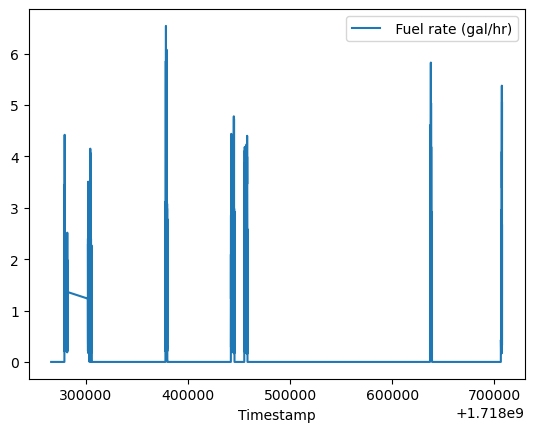

In [90]:
df_with_api.plot(x="Timestamp", y=' Fuel rate (gal/hr)')

In [78]:
#merge data into one csv

full_df.to_csv('merged_vehicle_data_files.csv', index=False)

In [79]:
full_df

,Time (sec),Latitude (deg),Longitude (deg),Vehicle speed (MPH),Instant CO2 rate (lb/mile),Total CO2 (lbs),CO2 flow (lb/min),Instant fuel economy (MPG),Total fuel economy (MPG),Fuel rate (gal/hr),...,Rotation Rate Y (deg/s),Rotation Rate Z (deg/s),Trip Fuel (gal),Trip Fuel Economy (MPG),Intake air temperature bank 1 sensor 2 (°F),Intake air temperature bank 1 sensor 3 (°F),Intake air temperature bank 2 sensor 1 (°F),Intake air temperature bank 2 sensor 2 (°F),Intake air temperature bank 2 sensor 3 (°F),Vehicle Odometer Reading (miles)
0,0.000,0.00000,0.0000,0.0,0.0,0.0000,0.000000,0.0,0.00000,0.000000,...,0.00000,0.00000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000,0.00000,0.0000,0.0,0.0,0.0000,0.000000,0.0,0.00000,0.000000,...,0.00000,0.00000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000,0.00000,0.0000,0.0,0.0,0.0000,0.000000,0.0,0.00000,0.000000,...,0.00000,0.00000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000,0.00000,0.0000,0.0,0.0,0.0000,0.000000,0.0,0.00000,0.000000,...,0.00000,0.00000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000,0.00000,0.0000,0.0,0.0,0.0000,0.000000,0.0,0.00000,0.000000,...,0.00000,0.00000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3524,3678.923,34.03304,-118.4652,0.0,0.0,251.7497,0.009296,0.0,31.01034,0.028464,...,-57.29681,-21.04448,1.041432,29.66561,0.0,0.0,0.0,0.0,0.0,0.0
3525,3679.930,34.03304,-118.4652,0.0,0.0,251.7497,0.009296,0.0,31.01034,0.028464,...,68.73888,-24.71661,1.041432,29.66561,0.0,0.0,0.0,0.0,0.0,0.0
3526,3680.935,34.03305,-118.4652,0.0,0.0,251.7497,0.009296,0.0,31.01034,0.028464,...,24.48018,-51.31284,1.041432,29.66561,0.0,0.0,0.0,0.0,0.0,0.0
3527,3681.915,34.03305,-118.4652,0.0,0.0,251.7497,0.009296,0.0,31.01034,0.028464,...,-41.95052,-16.55858,1.041432,29.66561,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

min_max = MinMaxScaler()
min_max_df = pd.DataFrame(min_max.fit_transform(full_df), columns = full_df.columns)

In [86]:
full_df.shape

(19833, 51)

In [87]:
#different ways to account for NaN and 0 values
#experiement with using mean or winsorization
full_df.mean(axis=0, skipna = True)

0.000                                                                179.404529
34.24313                                                              34.243148
-118.5323                                                           -118.532300
0                                                                      0.000000
Time (sec)                                                          1359.205109
 Latitude (deg)                                                       34.106106
 Longitude (deg)                                                    -118.385214
 Vehicle speed (MPH)                                                  31.875059
 Instant CO2 rate (lb/mile)                                            0.804925
 Total CO2 (lbs)                                                      59.514408
 CO2 flow (lb/min)                                                     0.326109
 Instant fuel economy (MPG)                                           53.841791
 Total fuel economy (MPG)               

In [88]:
mean_df = full_df.mean(axis=0, skipna = True)

#use for spread later
std_df = full_df.std(axis=0, skipna=True)
var_df = full_df.var(axis=0, skipna=True)

mean_and_std = [{
    
    'mean': mean_df.iloc[1],
    'std': std_df.iloc[1],
    'var': var_df.iloc[1]
    
}]

In [89]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19833 entries, 0 to 2504
Data columns (total 51 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   0.000                                                             359 non-null    float64
 1   34.24313                                                          359 non-null    float64
 2   -118.5323                                                         359 non-null    float64
 3   0                                                                 359 non-null    float64
 4   Time (sec)                                                        19474 non-null  float64
 5    Latitude (deg)                                                   19474 non-null  float64
 6    Longitude (deg)                                                  19474 non-null  float64
 7    Vehicle speed (MPH)                 

In [90]:
#display all keys, it's more than necessary at this point in time because it's for ice vehicles

full_df.keys()

Index(['0.000', '34.24313', '-118.5323', '0', 'Time (sec)', ' Latitude (deg)',
       ' Longitude (deg)', ' Vehicle speed (MPH)',
       ' Instant CO2 rate (lb/mile)', ' Total CO2 (lbs)', ' CO2 flow (lb/min)',
       ' Instant fuel economy (MPG)', ' Total fuel economy (MPG)',
       ' Fuel rate (gal/hr)', ' Fuel system 1 status',
       ' Calculated load value (%)', ' Engine coolant temperature (°F)',
       ' Fuel rail pressure (gauge) (psi)', ' Engine RPM (RPM)',
       ' Intake air temperature (°F)',
       ' O2 sensor voltage wide range (Bank 2  Sensor 4) (V)',
       ' O2 sensor lambda wide range (current probe)  (Bank 1  Sensor 1)',
       ' Absolute load value (%)', ' Ambient air temperature (°F)',
       ' Fuel type', ' Alcohol fuel percentage (%)',
       ' Evap system vapor pressure (inH2O)', ' Engine oil temperature (°F)',
       ' Engine coolant temperature 1 (°F)',
       ' Intake air temperature bank 1  sensor 1 (°F)',
       ' Commanded intake air flow A control (%)',
  

In [91]:
#correlation test. uses fuel rate in this one to check for the other features
corrs = full_df.corr()[' Fuel rate (gal/hr)']

corrs_sorted = corrs.sort_values(ascending=False)
corrs_sorted

 Fuel rate (gal/hr)                                                 1.000000
 Engine Power (hp)                                                  1.000000
 CO2 flow (lb/min)                                                  1.000000
 Engine Torque (lb•ft)                                              0.925540
 Calculated load value (%)                                          0.879004
 Engine RPM (RPM)                                                   0.846141
 Absolute load value (%)                                            0.669323
 Vehicle speed (MPH)                                                0.475830
 Instant CO2 rate (lb/mile)                                         0.322577
 Acceleration (ft/s²)                                               0.314867
 Acceleration (Avg) (ft/s²)                                         0.251725
 Max Speed (MPH)                                                    0.134720
 Engine coolant temperature (°F)                                    0.056581

In [92]:
#sort
corrs_sorted = corrs.sort_values(ascending=False)
corrs_sorted

 Fuel rate (gal/hr)                                                 1.000000
 Engine Power (hp)                                                  1.000000
 CO2 flow (lb/min)                                                  1.000000
 Engine Torque (lb•ft)                                              0.925540
 Calculated load value (%)                                          0.879004
 Engine RPM (RPM)                                                   0.846141
 Absolute load value (%)                                            0.669323
 Vehicle speed (MPH)                                                0.475830
 Instant CO2 rate (lb/mile)                                         0.322577
 Acceleration (ft/s²)                                               0.314867
 Acceleration (Avg) (ft/s²)                                         0.251725
 Max Speed (MPH)                                                    0.134720
 Engine coolant temperature (°F)                                    0.056581

In [73]:
full_df.dropna(axis=1, how='all')

,0.000,34.24313,-118.5323,0,Time (sec),Latitude (deg),Longitude (deg),Vehicle speed (MPH),Instant CO2 rate (lb/mile),Total CO2 (lbs),...,Rotation Rate Y (deg/s),Rotation Rate Z (deg/s),Trip Fuel (gal),Trip Fuel Economy (MPG),Intake air temperature bank 1 sensor 2 (°F),Intake air temperature bank 1 sensor 3 (°F),Intake air temperature bank 2 sensor 1 (°F),Intake air temperature bank 2 sensor 2 (°F),Intake air temperature bank 2 sensor 3 (°F),Vehicle Odometer Reading (miles)
0,0.363,34.24313,-118.5323,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.367,34.24314,-118.5323,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.368,34.24314,-118.5323,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.368,34.24314,-118.5323,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.367,34.24314,-118.5323,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3524,NaN,NaN,NaN,NaN,3678.923,34.03304,-118.4652,0.0,0.0,251.7497,...,-57.29681,-21.04448,1.041432,29.66561,0.0,0.0,0.0,0.0,0.0,0.0
3525,NaN,NaN,NaN,NaN,3679.930,34.03304,-118.4652,0.0,0.0,251.7497,...,68.73888,-24.71661,1.041432,29.66561,0.0,0.0,0.0,0.0,0.0,0.0
3526,NaN,NaN,NaN,NaN,3680.935,34.03305,-118.4652,0.0,0.0,251.7497,...,24.48018,-51.31284,1.041432,29.66561,0.0,0.0,0.0,0.0,0.0,0.0
3527,NaN,NaN,NaN,NaN,3681.915,34.03305,-118.4652,0.0,0.0,251.7497,...,-41.95052,-16.55858,1.041432,29.66561,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
#check for nan
nan_count = np.sum(full_df.isnull(), axis=0)
nan_count

0.000                                            33241
34.24313                                         33241
-118.5323                                        33241
0                                                33241
Time (sec)                                         359
                                                 ...  
 Intake air temperature bank 1  sensor 3 (°F)    19833
 Intake air temperature bank 2  sensor 1 (°F)    19833
 Intake air temperature bank 2  sensor 2 (°F)    19833
 Intake air temperature bank 2  sensor 3 (°F)    19833
 Vehicle Odometer Reading (miles)                19833
Length: 68, dtype: int64

In [75]:
full_df = full_df.drop(columns = ['0.000', '34.24313', '-118.5323', '0'])

In [76]:
nan_detected = nan_count!=0
nan_detected

0.000                                            True
34.24313                                         True
-118.5323                                        True
0                                                True
Time (sec)                                       True
                                                 ... 
 Intake air temperature bank 1  sensor 3 (°F)    True
 Intake air temperature bank 2  sensor 1 (°F)    True
 Intake air temperature bank 2  sensor 2 (°F)    True
 Intake air temperature bank 2  sensor 3 (°F)    True
 Vehicle Odometer Reading (miles)                True
Length: 68, dtype: bool

In [77]:
#Replacing NaNs with values
#try the mean for now
#try 0s

full_df.fillna(0, inplace=True)
full_df

,Time (sec),Latitude (deg),Longitude (deg),Vehicle speed (MPH),Instant CO2 rate (lb/mile),Total CO2 (lbs),CO2 flow (lb/min),Instant fuel economy (MPG),Total fuel economy (MPG),Fuel rate (gal/hr),...,Rotation Rate Y (deg/s),Rotation Rate Z (deg/s),Trip Fuel (gal),Trip Fuel Economy (MPG),Intake air temperature bank 1 sensor 2 (°F),Intake air temperature bank 1 sensor 3 (°F),Intake air temperature bank 2 sensor 1 (°F),Intake air temperature bank 2 sensor 2 (°F),Intake air temperature bank 2 sensor 3 (°F),Vehicle Odometer Reading (miles)
0,0.000,0.00000,0.0000,0.0,0.0,0.0000,0.000000,0.0,0.00000,0.000000,...,0.00000,0.00000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000,0.00000,0.0000,0.0,0.0,0.0000,0.000000,0.0,0.00000,0.000000,...,0.00000,0.00000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000,0.00000,0.0000,0.0,0.0,0.0000,0.000000,0.0,0.00000,0.000000,...,0.00000,0.00000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000,0.00000,0.0000,0.0,0.0,0.0000,0.000000,0.0,0.00000,0.000000,...,0.00000,0.00000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000,0.00000,0.0000,0.0,0.0,0.0000,0.000000,0.0,0.00000,0.000000,...,0.00000,0.00000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3524,3678.923,34.03304,-118.4652,0.0,0.0,251.7497,0.009296,0.0,31.01034,0.028464,...,-57.29681,-21.04448,1.041432,29.66561,0.0,0.0,0.0,0.0,0.0,0.0
3525,3679.930,34.03304,-118.4652,0.0,0.0,251.7497,0.009296,0.0,31.01034,0.028464,...,68.73888,-24.71661,1.041432,29.66561,0.0,0.0,0.0,0.0,0.0,0.0
3526,3680.935,34.03305,-118.4652,0.0,0.0,251.7497,0.009296,0.0,31.01034,0.028464,...,24.48018,-51.31284,1.041432,29.66561,0.0,0.0,0.0,0.0,0.0,0.0
3527,3681.915,34.03305,-118.4652,0.0,0.0,251.7497,0.009296,0.0,31.01034,0.028464,...,-41.95052,-16.55858,1.041432,29.66561,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
#to winsorize or impute?
#check with papers

#something to note -> terminology for that solution of optimizing routes for energy consumption was 'Eco-Routing'. 
#other solutions noted in articles will be tacked on as they're read through 

"""

important features to note -> 

- Co2 rate

Recursive Feature Elim-
ination (RFE) from SKLearn is a feature ranking system. An external estimator is trained on the initial set of features,
assigning them an importance value. The higher the importance value, the more relevant the corresponding feature

--> At some point, include all the specs of 2017 Toyota Corolla (weight, drive, etc)

Map out whether features can be dropped altogether or if it's an issue with how the obd-ii sensor is connecting to my car

1. Eco Routing
2. Eco-Approach and Departure
3. As a whole, most papers show that HEVS are more efficient than ICEs. That's not surprising, since HEVs are more modern anyway
4. Min-Max normalization was used to normalize data

"""

"\n\nimportant features to note -> \n\n- Co2 rate\n\nRecursive Feature Elim-\nination (RFE) from SKLearn is a feature ranking system. An external estimator is trained on the initial set of features,\nassigning them an importance value. The higher the importance value, the more relevant the corresponding feature\n\n--> At some point, include all the specs of 2017 Toyota Corolla (weight, drive, etc)\n\nMap out whether features can be dropped altogether or if it's an issue with how the obd-ii sensor is connecting to my car\n\n1. Eco Routing\n2. Eco-Approach and Departure\n3. As a whole, most papers show that HEVS are more efficient than ICEs. That's not surprising, since HEVs are more modern anyway\n4. Min-Max normalization was used to normalize data\n\n"

In [111]:
#top 5
top_5 = corrs_sorted[0:5].index
top_five_corr = list(top_5)
top_five_corr

[' Fuel rate (gal/hr)',
 ' Engine Power (hp)',
 ' CO2 flow (lb/min)',
 ' Engine Torque (lb•ft)',
 ' Calculated load value (%)']

In [112]:
#drop NaNs
is_int_or_float = (full_df.dtypes == 'int64') | (full_df.dtypes == 'float64')
is_int_or_float

Time (sec)                                                          True
 Latitude (deg)                                                     True
 Longitude (deg)                                                    True
 Vehicle speed (MPH)                                                True
 Instant CO2 rate (lb/mile)                                         True
 Total CO2 (lbs)                                                    True
 CO2 flow (lb/min)                                                  True
 Instant fuel economy (MPG)                                         True
 Total fuel economy (MPG)                                           True
 Fuel rate (gal/hr)                                                 True
 Fuel system 1 status                                               True
 Calculated load value (%)                                          True
 Engine coolant temperature (°F)                                    True
 Fuel rail pressure (gauge) (psi)                  

In [21]:
#to_impute = nan_count & is_int_or_float
#to_impute

0.000                                                               False
34.24313                                                            False
-118.5323                                                           False
0                                                                   False
Time (sec)                                                           True
 Latitude (deg)                                                      True
 Longitude (deg)                                                     True
 Vehicle speed (MPH)                                                 True
 Instant CO2 rate (lb/mile)                                          True
 Total CO2 (lbs)                                                     True
 CO2 flow (lb/min)                                                   True
 Instant fuel economy (MPG)                                          True
 Total fuel economy (MPG)                                            True
 Fuel rate (gal/hr)                   

In [22]:
#full_df.columns[to_impute]

Index(['Time (sec)', ' Latitude (deg)', ' Longitude (deg)',
       ' Vehicle speed (MPH)', ' Instant CO2 rate (lb/mile)',
       ' Total CO2 (lbs)', ' CO2 flow (lb/min)', ' Instant fuel economy (MPG)',
       ' Total fuel economy (MPG)', ' Fuel rate (gal/hr)',
       ' Fuel system 1 status', ' Calculated load value (%)',
       ' Engine coolant temperature (°F)', ' Fuel rail pressure (gauge) (psi)',
       ' Engine RPM (RPM)', ' Intake air temperature (°F)',
       ' O2 sensor voltage wide range (Bank 2  Sensor 4) (V)',
       ' O2 sensor lambda wide range (current probe)  (Bank 1  Sensor 1)',
       ' Absolute load value (%)', ' Ambient air temperature (°F)',
       ' Fuel type', ' Alcohol fuel percentage (%)',
       ' Evap system vapor pressure (inH2O)', ' Engine oil temperature (°F)',
       ' Engine coolant temperature 1 (°F)',
       ' Intake air temperature bank 1  sensor 1 (°F)',
       ' Commanded intake air flow A control (%)',
       ' Relative intake air flow A position (%)

In [113]:
#top_five_corr.append(' Fuel rate (gal/hr)')
df_sub = full_df[top_five_corr]
#frames = [df_sub, full_df[' Fuel rate (gal/hr)']]
df_sub = pd.concat([df_sub, full_df[' Fuel rate (gal/hr)']])
df_sub

#why does taking from the full_df to create a df_sub cause NaNs to appear? is it pulling it wrong?

,Fuel rate (gal/hr),Engine Power (hp),CO2 flow (lb/min),Engine Torque (lb•ft),Calculated load value (%),0
0,1.033328,14.168076,0.326109,39.978464,55.630682,NaN
1,1.033328,14.168076,0.326109,39.978464,55.630682,NaN
2,1.033328,14.168076,0.326109,39.978464,55.630682,NaN
3,1.033328,14.168076,0.326109,39.978464,55.630682,NaN
4,1.033328,14.168076,0.326109,39.978464,55.630682,NaN
...,...,...,...,...,...,...
2500,NaN,NaN,NaN,NaN,NaN,0.028464
2501,NaN,NaN,NaN,NaN,NaN,0.028464
2502,NaN,NaN,NaN,NaN,NaN,0.028464
2503,NaN,NaN,NaN,NaN,NaN,0.028464


In [114]:
df_sub[' Fuel rate (gal/hr)']

0       1.033328
1       1.033328
2       1.033328
3       1.033328
4       1.033328
          ...   
2500         NaN
2501         NaN
2502         NaN
2503         NaN
2504         NaN
Name:  Fuel rate (gal/hr), Length: 39666, dtype: float64

In [115]:
df_sub.fillna(df_sub.mean(), inplace=True)
df_sub

,Fuel rate (gal/hr),Engine Power (hp),CO2 flow (lb/min),Engine Torque (lb•ft),Calculated load value (%),0
0,1.033328,14.168076,0.326109,39.978464,55.630682,1.033328
1,1.033328,14.168076,0.326109,39.978464,55.630682,1.033328
2,1.033328,14.168076,0.326109,39.978464,55.630682,1.033328
3,1.033328,14.168076,0.326109,39.978464,55.630682,1.033328
4,1.033328,14.168076,0.326109,39.978464,55.630682,1.033328
...,...,...,...,...,...,...
2500,1.033328,14.168076,0.326109,39.978464,55.630682,0.028464
2501,1.033328,14.168076,0.326109,39.978464,55.630682,0.028464
2502,1.033328,14.168076,0.326109,39.978464,55.630682,0.028464
2503,1.033328,14.168076,0.326109,39.978464,55.630682,0.028464


In [116]:
df_sub[' Fuel rate (gal/hr)']

0       1.033328
1       1.033328
2       1.033328
3       1.033328
4       1.033328
          ...   
2500    1.033328
2501    1.033328
2502    1.033328
2503    1.033328
2504    1.033328
Name:  Fuel rate (gal/hr), Length: 39666, dtype: float64

In [117]:
full_df[' Fuel rate (gal/hr)']

0       1.033328
1       1.033328
2       1.033328
3       1.033328
4       1.033328
          ...   
2500    0.028464
2501    0.028464
2502    0.028464
2503    0.028464
2504    0.028464
Name:  Fuel rate (gal/hr), Length: 19833, dtype: float64

In [ ]:
import scipy.stats as stats

#if winsorization is experimented with later for one of the features, this can be done here
#replace 0.01 for extreme points as necessary
"""
full_df[''] = stats.mstats. winsorize(full_df[], limits = [0.01, 0.01])

"""

C:\Users\Miles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Miles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Miles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Miles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

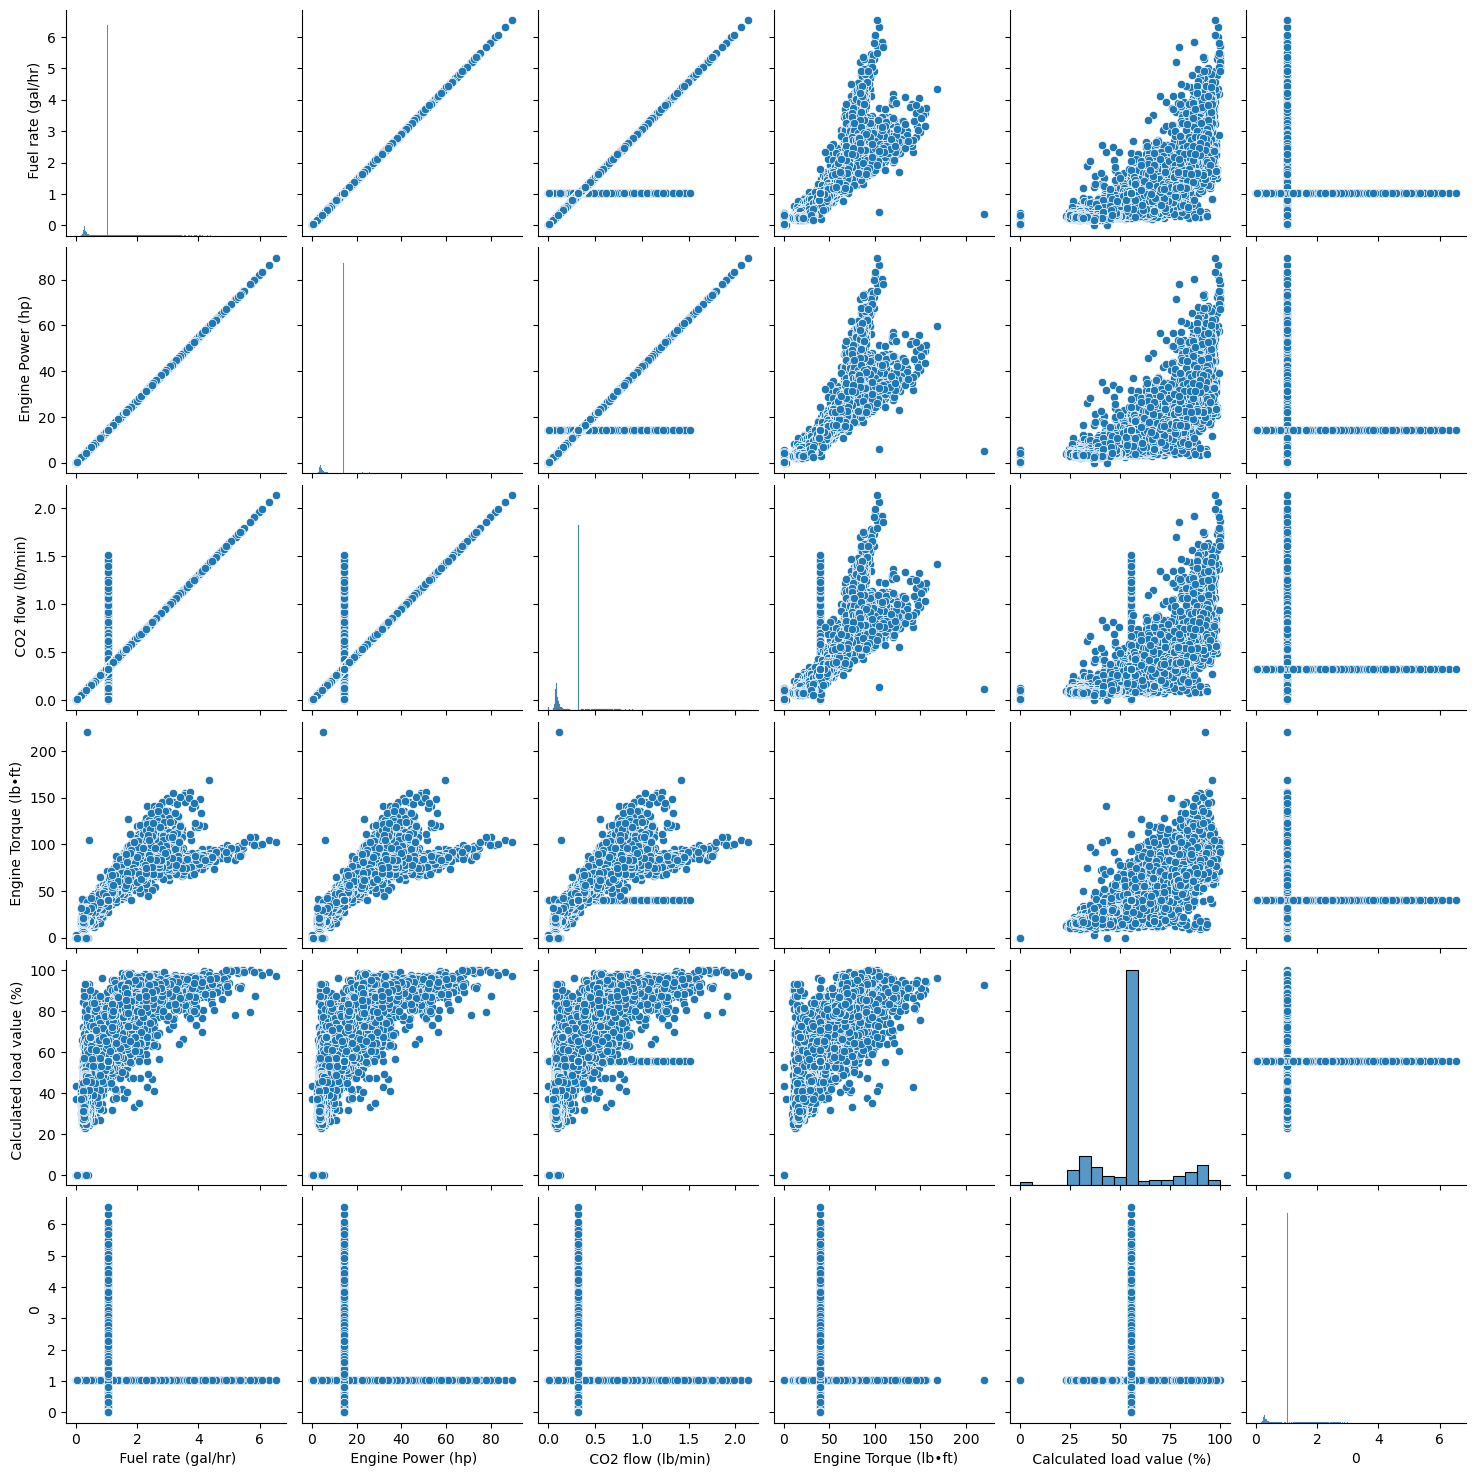

In [118]:
#observe the scatterplots for the correlated features to the test lable

sns.pairplot(data=df_sub)

#come back to this one to figure out the memory issue when trying to run that line

In [119]:
# there's some linearity 
#maybe try a basic decisiontree to see how it looks

df.isnull().values.any()

#check for any null values left after some cleaing

False

Text(0.5, 1.0, 'Total fuel economy (MPG) vs index')

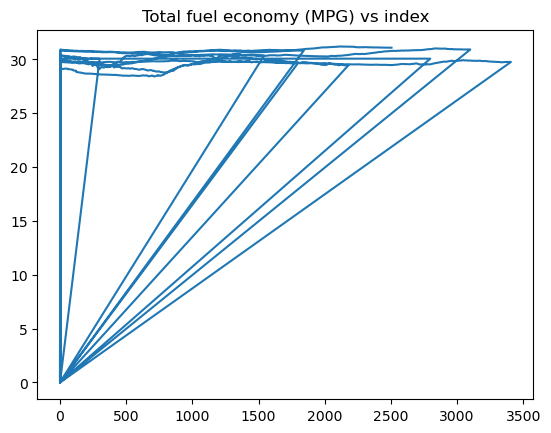

In [105]:
plt.plot(full_df.index, full_df[" Total fuel economy (MPG)"])
plt.title("Total fuel economy (MPG) vs index")

In [106]:
full_df[full_df.duplicated('Time (sec)', keep = False) == True]

,Time (sec),Latitude (deg),Longitude (deg),Vehicle speed (MPH),Instant CO2 rate (lb/mile),Total CO2 (lbs),CO2 flow (lb/min),Instant fuel economy (MPG),Total fuel economy (MPG),Fuel rate (gal/hr),...,Acceleration (Avg) (ft/s²),Engine Power (hp),Engine Torque (lb•ft),A/F Actual,Fuel Remaining (gal),Trip Distance (miles),Trip Duration (min),Max Speed (MPH),Average Trip CO2 Rate (lb/mile),Total Trip CO2 (lbs)
0,1359.205109,34.106106,-118.385214,31.875059,0.804925,59.514408,0.326109,53.841791,30.077061,1.033328,...,-0.010438,14.168076,39.978464,14.879679,0.0,10.903794,22.206529,67.229113,1.050237,7.031224
1,1359.205109,34.106106,-118.385214,31.875059,0.804925,59.514408,0.326109,53.841791,30.077061,1.033328,...,-0.010438,14.168076,39.978464,14.879679,0.0,10.903794,22.206529,67.229113,1.050237,7.031224
2,1359.205109,34.106106,-118.385214,31.875059,0.804925,59.514408,0.326109,53.841791,30.077061,1.033328,...,-0.010438,14.168076,39.978464,14.879679,0.0,10.903794,22.206529,67.229113,1.050237,7.031224
3,1359.205109,34.106106,-118.385214,31.875059,0.804925,59.514408,0.326109,53.841791,30.077061,1.033328,...,-0.010438,14.168076,39.978464,14.879679,0.0,10.903794,22.206529,67.229113,1.050237,7.031224
4,1359.205109,34.106106,-118.385214,31.875059,0.804925,59.514408,0.326109,53.841791,30.077061,1.033328,...,-0.010438,14.168076,39.978464,14.879679,0.0,10.903794,22.206529,67.229113,1.050237,7.031224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.000000,34.192060,-118.141600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
287,293.654000,34.182810,-118.158900,8.699197,0.520443,79.714960,0.075457,37.652210,29.761940,0.231041,...,-5.187440,3.167826,18.409720,13.332640,0.0,1.420015,4.893104,39.767760,0.673782,0.956616
1428,1442.630000,34.107460,-118.250000,15.534280,0.363909,85.752250,0.094218,53.848170,30.407880,0.288483,...,-0.570169,3.955422,18.203130,15.147300,0.0,13.418100,24.041060,80.156880,0.521319,6.993910
0,0.000000,34.033020,-118.465100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [107]:
def accumulate_trip_col(colName): 
    zero_index_arr = list(full_df[full_df[colName].diff() < 0].index)

    zero_index_arr.append(len(full_df))

    #print(zero_index_arr)
    for i, zero_index in enumerate(zero_index_arr[:-1]):
        next_index = zero_index_arr[i+1]

        start_distance = full_df.iloc[zero_index-1][colName]
        #print(f"{zero_index}  {next_index} {start_distance}")

        full_df.loc[zero_index:next_index-1, colName] += start_distance

Text(0.5, 1.0, 'Fuel rate (gal/hr) vs index')

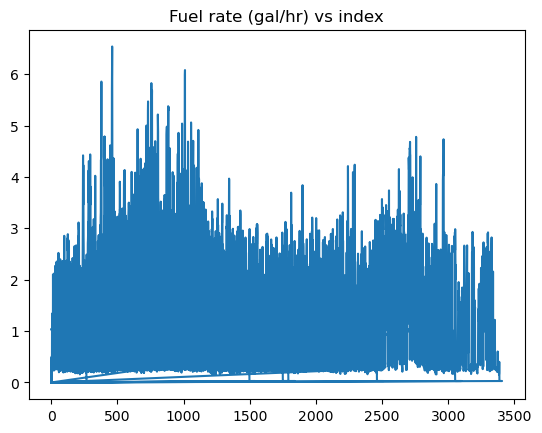

In [108]:
plt.plot(full_df.index,full_df[' Fuel rate (gal/hr)'])
plt.title("Fuel rate (gal/hr) vs index")

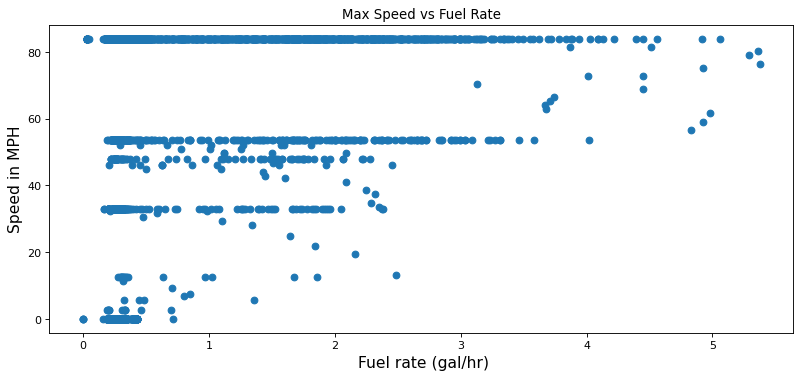

In [109]:
figure(figsize=(12, 5), dpi=80, linewidth=10)
plt.scatter(df[' Fuel rate (gal/hr)'], df[' Max Speed (MPH)'])
plt.title('Max Speed vs Fuel Rate')
plt.xlabel(' Fuel rate (gal/hr)', fontsize=14)
plt.ylabel('Speed in MPH', fontsize=14)
plt.show()


In [64]:
"""
import plotly.express as px

colors = [
    'rgb(255, 165, 0)',  # Orange
    'rgb(255, 69, 0)',   # Dark Orange
    'rgb(255, 0, 0)',    # Red
    'rgb(139, 0, 0)',    # Red
    'rgb(0, 0, 0)',    # Black
]

fig = px.scatter_mapbox(full_df,
           lat= ' Latitude (deg)',
           lon= ' Longitude (deg)',
           hover_name= "Aircon Consumption Power (kW)",
           color_continuous_scale=colors, 
                        zoom=7,
                        height=800,
                        width=1200                     
)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

"""

'\nimport plotly.express as px\n\ncolors = [\n    \'rgb(255, 165, 0)\',  # Orange\n    \'rgb(255, 69, 0)\',   # Dark Orange\n    \'rgb(255, 0, 0)\',    # Red\n    \'rgb(139, 0, 0)\',    # Red\n    \'rgb(0, 0, 0)\',    # Black\n]\n\nfig = px.scatter_mapbox(full_df,\n           lat= \' Latitude (deg)\',\n           lon= \' Longitude (deg)\',\n           hover_name= "Aircon Consumption Power (kW)",\n           color_continuous_scale=colors, \n                        zoom=7,\n                        height=800,\n                        width=1200                     \n)\n\nfig.update_layout(mapbox_style="open-street-map")\nfig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})\nfig.show()\n\n'

In [ ]:

#use this cell another time for feature selection experimentation
"""
from sklearn.preprocessing import MinMaxScaler, minmax_scale
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

#features to select; ' Fuel rate (gal/hr)', ' Engine Power (hp)'

X, y = load_digits(return_X_y = True)

#scalar = MinMaxScaler()
pipe = Pipeline(
    [
        ("scaling", MinMaxScaler()),
        # the reduce_dim stage is populated by the param_grid
        ("reduce_dim", "passthrough"),
        ("classify", LinearSVC(dual=False, max_iter=10000)),
    ]
)

N_FEATURES_OPTIONS = [2, 4, 8]
C_OPTIONS = [1, 10, 100, 1000]

param_grid = [
    {
        "reduce_dim": [PCA(iterated_power=7), NMF(max_iter=1_000)],
        "reduce_dim__n_components": N_FEATURES_OPTIONS,
        "classify__C": C_OPTIONS,
    },
    {
        "reduce_dim": [SelectKBest(mutual_info_classif)],
        "reduce_dim__k": N_FEATURES_OPTIONS,
        "classify__C": C_OPTIONS,
    },
]
reducer_labels = ["PCA", "NMF", "KBest(mutual_info_classif)"]

grid = GridSearchCV(pipe, n_jobs=1, param_grid=param_grid)
grid.fit(X, y)

#scalar.fit(full_df[' Fuel rate (gal/hr)'])
#full_df[' Fuel rate (gal/hr)']

"""

In [110]:
full_df[' Engine Power (hp)']

0       14.168076
1       14.168076
2       14.168076
3       14.168076
4       14.168076
          ...    
2500     0.390276
2501     0.390276
2502     0.390276
2503     0.390276
2504     0.390276
Name:  Engine Power (hp), Length: 19833, dtype: float64

In [ ]:
"""

Model exploration after preprocess:

Random Forest Regressor and XGBoost

features selected for hybrid model research last year

features_to_select = [


Time (sec)
Latitude (deg)
Longitude(deg)
Instant fuel eceonomy (MPG)
Total fuel economy (MPG)
Fuel rate (gal/hr)
Instant Co2 rate (lb/mile)
CO2 flow (lb/min)
Mass air flow rate (lb/min)
Intake manifold absolute pressure (inHg)
Engine Speed (RPM)
Intake AIr (F)
Hybrid batter pack remaining life (%)
Boost (psi)
Acceleration (ft/s^2)
Vehicle Speed (MPH)
Batery Voltage (V)
Battery Block Max Voltage (V)
Solar Sensor (Driver Side)
Fuel Input (gal)
Vehicle Load (%)
Outside Temp
Room Temperature Sensor (F)
Humidity 
Wind Speed
Pressue

]


"""

In [3]:
#read through the csvs provided 
files = glob.glob('C:/Users/Miles/Desktop/ICE data/Apps/OBDLink (1)/CsvLogs/No AC/*.csv')

non_ac_df = pd.DataFrame()

for csv_file in files:
    df = pd.read_csv(csv_file, skiprows=[0, 1])
    non_ac_df = pd.concat([non_ac_df, df])

In [4]:
#merge data into one csv

non_ac_df.to_csv('merged_vehicle_data_file_without_ac.csv', index=False)

In [6]:
#using the data from the day that didn't use a.c

#non_ac_df = pd.read_csv('C:/Users/Miles/Desktop/CSVLog_20240620_081027_without_ac_on.csv', skiprows=[0,1])
print(non_ac_df.shape)

(3060, 64)


In [7]:
non_ac_df

,Time (sec),Latitude (deg),Longitude (deg),Vehicle speed (MPH),Instant CO2 rate (lb/mile),Total CO2 (lbs),CO2 flow (lb/min),Instant fuel economy (MPG),Total fuel economy (MPG),Fuel rate (gal/hr),...,Rotation Rate Y (deg/s),Rotation Rate Z (deg/s),Trip Fuel (gal),Trip Fuel Economy (MPG),Intake air temperature bank 1 sensor 2 (°F),Intake air temperature bank 1 sensor 3 (°F),Intake air temperature bank 2 sensor 1 (°F),Intake air temperature bank 2 sensor 2 (°F),Intake air temperature bank 2 sensor 3 (°F),Vehicle Odometer Reading (miles)
0,0.000,34.03297,-118.4651,0.0,0.0,0.0000,0.000000,0.0,0.00000,0.000000,...,-0.468765,1.347672,0.000000,0.00000,0,0,0,0,0,0
1,0.485,34.03297,-118.4651,0.0,0.0,0.0000,0.000000,0.0,31.26948,0.000000,...,-3.756042,-3.305725,0.000000,0.00000,0,0,0,0,0,0
2,1.536,34.03297,-118.4651,0.0,0.0,0.0000,0.000000,0.0,31.26948,0.000000,...,-11.044630,3.148407,0.000000,0.00000,0,0,0,0,0,0
3,2.481,34.03297,-118.4651,0.0,0.0,0.0000,0.000000,0.0,31.26948,0.000000,...,-54.751510,9.731140,0.000000,0.00000,0,0,0,0,0,0
4,3.538,34.03297,-118.4651,0.0,0.0,160.0990,0.158207,0.0,31.26879,0.484409,...,-8.602905,3.294052,0.000183,0.00000,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1506,1533.160,34.24310,-118.5323,0.0,0.0,199.9025,0.009296,0.0,30.93406,0.028464,...,2.255615,0.482025,0.641858,30.27457,0,0,0,0,0,0
1507,1534.147,34.24310,-118.5323,0.0,0.0,199.9025,0.009296,0.0,30.93406,0.028464,...,-0.973358,0.135147,0.641858,30.27457,0,0,0,0,0,0
1508,1535.147,34.24310,-118.5323,0.0,0.0,199.9025,0.009296,0.0,30.93406,0.028464,...,0.647919,-0.207275,0.641858,30.27457,0,0,0,0,0,0
1509,1536.135,34.24310,-118.5323,0.0,0.0,199.9025,0.009296,0.0,30.93406,0.028464,...,-0.466385,-0.061890,0.641858,30.27457,0,0,0,0,0,0


In [ ]:
"""
Look for differences between this and current data -> compare for Prof Wang and Erin


"""

In [8]:
"""
variables to consider:

time
speed
instant fuel economy
fuel rate
trip fuel (gal)
Latitude (deg)
Longitude (deg) -> for overall distance

solving to find - aircon power (kW) for a toyota corolla 


-> 1 hp == 745.7 watts



"""

'\nvariables to consider:\n\n\n'